#Census US Dataset


> Name: Shamsa Tariq


> Course Code: CT7205


> Course Name: Machine learning and optimisation


In [45]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'adult-census-income:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F225%2F498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T185342Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d4d5b17287738cc9454f02873b1680a2fab30e979c69f4518575c07d3dcaca8ce64732437809b4416fa7392c192a7abe1d8e80ec52600dcc74baa892752122acab9f423d346e9ac5a90bfbf4287afeaf1e1894eba0b17b8988c60a8604114d7fdbf1029adef63b06d63d462754c15ff3bfe412f8330285ef74ab0d52f73b40aec2ddada22c7d6d85817738f246576a4b2a407c19e2cba5ab43f109bf6ec7e527295fae2b0808d069856353841623904740e71231a452351366334712e579d40175a44ab1b03e7b3989a40096fa25594acc801620f6e0885d1e866ea692a4c6e57288686d9e1fbe075d9f8d396fa7140c4013e61a1da4bfbc16056d0dcd04c6f,census-income-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3921313%2F6817826%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T185342Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8f56be7dccd1028e49ac8af155116e3aade3f88cf3e8db209b07e2b6618d53d8328154f8254d304d73f0363fdab42afc9621f73db446a6be7e0d54b7cfb04e97faf665b80be550b0d769dcc560ce82031eb31d0415e4780f08a5d5bfbdda4f755854304012ca38a12657b435715f5f89d673b0106e3990b6def787223ee62a9915478eccb88559452adc76d11318137473362d0baa4d85db7e6eb2def7df5b2f12f7c88be13dc057f04a2fd823a2e213a719b391e7c74f1a3fe353b634639e9b816d4ae6bde82392568d39b5549c0cd45232c709ae7992b7fb1dfd393b57d2d771ab16b10d2e7df23b7d988d9b9843c3603a2e3d840d6141bbb2d236fb034e71'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 460936 bytes downloaded
Downloaded and uncompressed: adult-census-income
[==================================================] 707150 bytes downloaded
Downloaded and uncompressed: census-income-dataset
Data source import complete.


# INCOME PREDICTION(CENSUS DATASET)

### Project Definintion

>The project determines whether a person makes income more than 50K or not. Once the data is successfully preproccesed, Using python’s supervised learning packages and algorithms model is built.

### Each column definition

>1.) age: Represents an individual’s years on earth.<br>
2.) workclass: Represents an individual’s employment status.<br>
3.) fnlwgt: Represents the final weight. This is the number of people the census believes the entry represents.<br>
4.) education: Represents an individual’s highest level of education achieved in object form.<br>
5.) education-num: Represents an individual’s highest level of education achieved in numerical form.<br>
6.) marital-status: Represents an individual’s civil status in relation to a significant other.<br>
7.) occupation: Represents an individual’s general occupation.<br>
8.) relationship: Represents an individual’s relation to others in a family unit. The options aren’t consistent and seem to overlap with marital-status column.<br>
9.) race: Represents an individual’s shared physical or general region of origin<br>
10.) sex: Represents an individual’s gender. This dataset only had two options for gender.<br>
11.) capital-gain: Represents an individual’s profit from the sale of property or an investment.<br>
12.) capital-loss: Represents an individual’s loss from the sale of property or an investment.<br>
13.) hours-per-week: Represents an individual’s hours worked per week.<br>
14.) native-country: Represents an individual’s country of origin.<br>
15.) Income: The amount of money an individual generates within a year.

## Loading The Dataset

In [46]:
# Importing all required libraries.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
import warnings
warnings.filterwarnings('ignore')


In [47]:
# Creating dataframe object using read_csv by passing the address of a file as a argument.

path="/kaggle/input/adult-census-income/adult.csv"
df=pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


##  Exploratory Data Analysis(Statistical Characterstics of the dataset)

In [48]:
# Finding number of rows and columns of the dataframe.

print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 32561
Number of Columns: 15


In [49]:
# Listing of all column names in dataframe.

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [50]:
# Listing of all unique items in all columns

for col in df.columns:
  print(col, '::\n', df[col].unique(), '\n\n')

age ::
 [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87] 


workclass ::
 ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 


fnlwgt ::
 [ 77053 132870 186061 ...  34066  84661 257302] 


education ::
 ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 


education.num ::
 [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 


marital.status ::
 ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 


occupation ::
 ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 

In [51]:
# Checking the non-null count of all columns and identifying the datatype of all columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
# Displaying count, mean, standard deviation, minimum, 25/50/75 percentile, maximum of all int columns.

description = df.describe()
description

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [53]:
# Checking the count of '?' in each columns.

df.isin(['?']).sum(axis=0)

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [54]:
# Checking the count of naN in each columns.

df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [55]:
# Replacing the '?' with naN in all columns.

df.replace("?", np.nan, inplace = True)

In [56]:
# After replacing, Now cross checking the naN count in all columns.

df.isna().sum(axis=0)

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [57]:
# Dropping the row which consists of naN.

df.dropna(inplace=True)

In [58]:
# After dropping, checking the count of naN in all columns.

df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [59]:
# Creating new column of income_num in dataframe. It is valued according to income.(Income : >50k = 1, <=50k = 0)

df['income_num']=df['income'].map({'<=50K':0, '>50K':1})
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_num
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [60]:
# Finding the count of rows which has below_50k income and above_50k income.

below_50k=(df.income_num == 0).sum()
print("Income with below 50k count :",below_50k)
above_50k=(df.income_num == 1).sum()
print("Income with above 50k count :",above_50k)

Income with below 50k count : 22654
Income with above 50k count : 7508


## Data Visualization

### a. Categorical Values

### Bar Charts

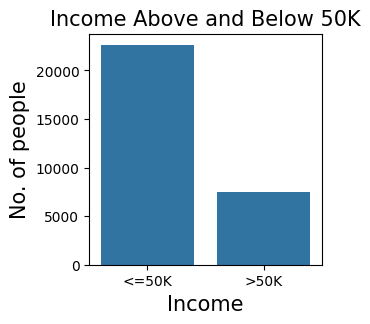

In [61]:
# Plotting bar chart income vs no. of people

fig,axes = plt.subplots(1,1,figsize=(3,3))
sns.countplot(data = df, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

> From above bar graph, we can understand that income less than 50k is three times of greater than 50k.

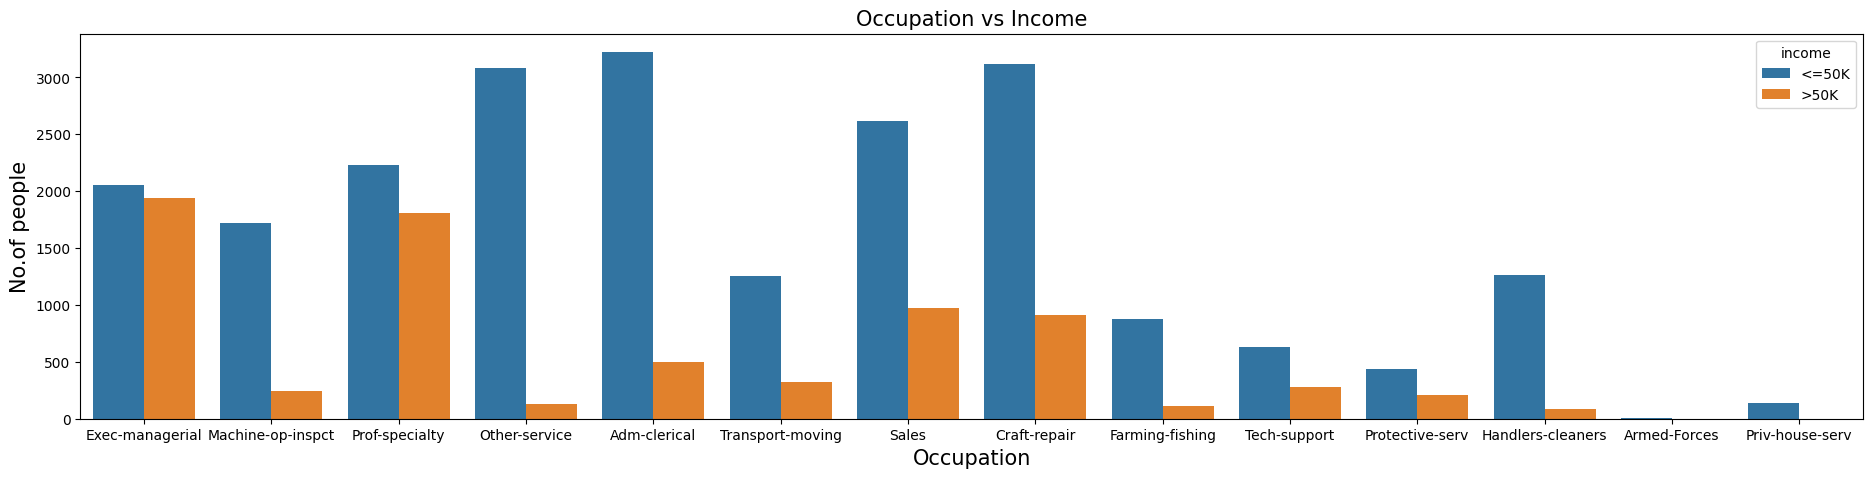

In [62]:
# Plotting the bar chart of occupation vs income count.

fig, axes = plt.subplots(1,1,figsize=(23,5))
sns.countplot(data=df,x='occupation',hue='income')
plt.title('Occupation vs Income',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above comparison bar graphs, we can understand that in most of the occupations, the number of peoples
having income<=50k is three times higher than number of peoples having income>50k.

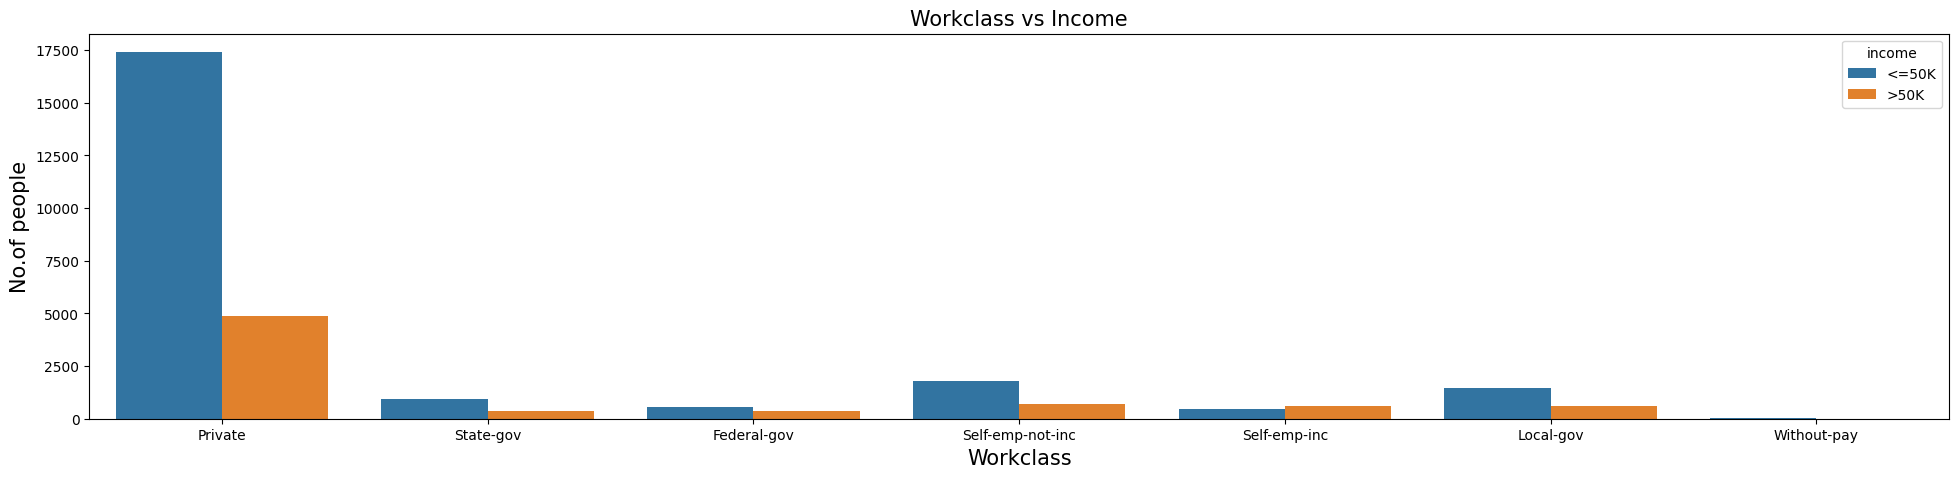

In [63]:
# Plotting the bar charts of workclass vs income count.

fig, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='workclass',hue='income')
plt.title('Workclass vs Income',fontsize=15)
plt.xlabel('Workclass',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above comparison bar graphs, we came to know that self employed workclass have more people of income >50k than
people of <=50k.

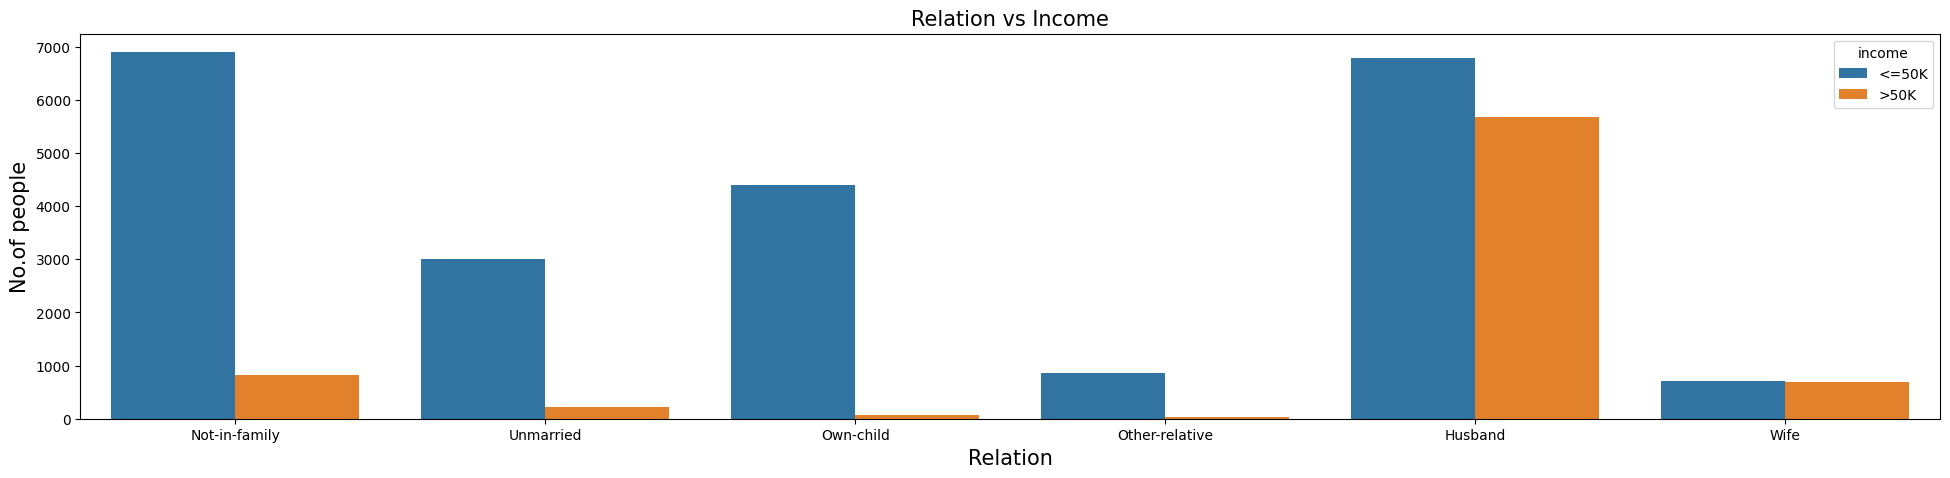

In [64]:
# Plotting the bar charts of relation vs income count.

fig, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='relationship',hue='income')
plt.title('Relation vs Income',fontsize=15)
plt.xlabel('Relation',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

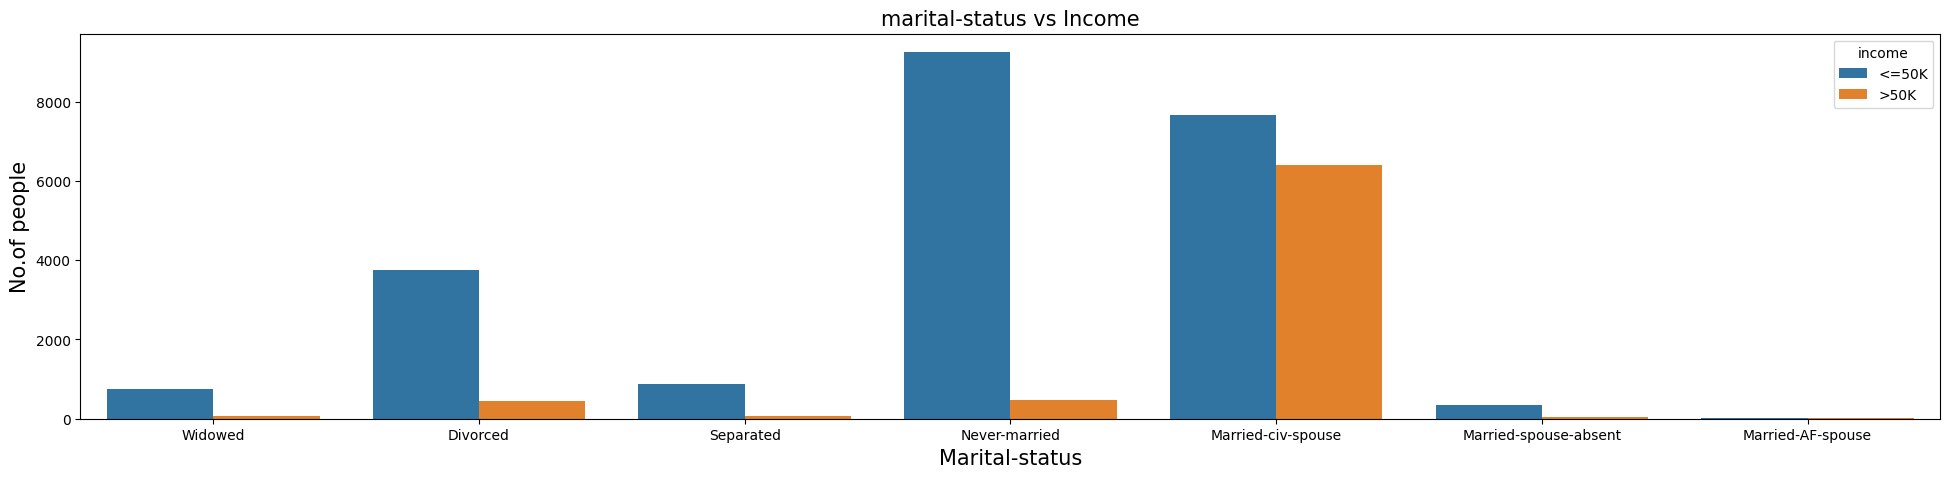

In [65]:
# Plotting the bar charts of marital-status vs income count.

fig, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='marital.status',hue='income')
plt.title('marital-status vs Income',fontsize=15)
plt.xlabel('Marital-status',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above comparison bar graph graph, we came to understand that people who are husbands, wives have almost
equal ratio in income earned of >50k and <=50k. And we can see the relation and marital-status bar charts are similar.

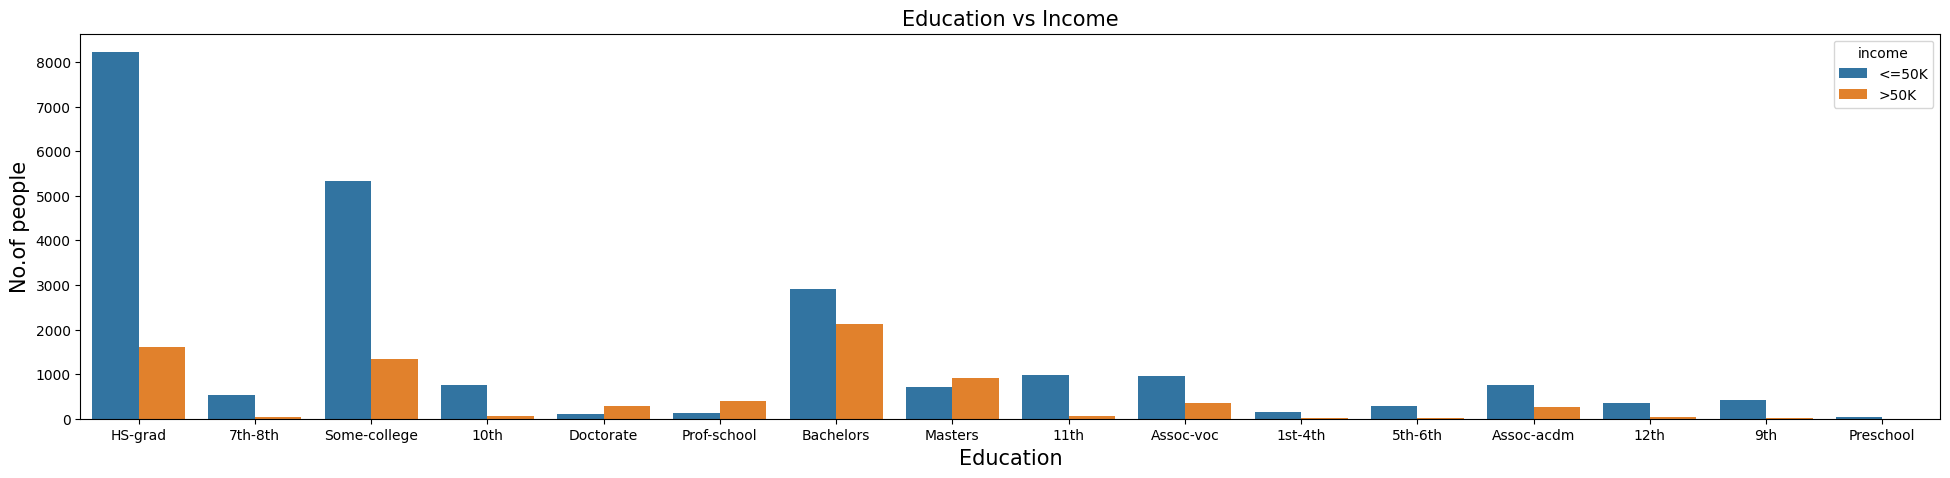

In [66]:
# Plotting the bar chart of education vs income count.

fig, axes = plt.subplots(1,1,figsize=(24,5))
sns.countplot(data=df,x='education',hue='income')
plt.title('Education vs Income',fontsize=15)
plt.xlabel('Education',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above graph, we came to understand that people who have education Bachelors, have more count of earning >50k.

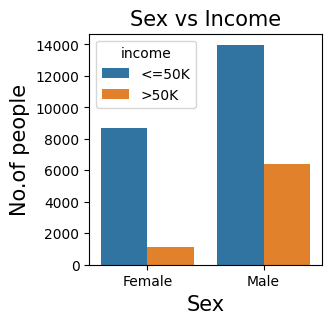

In [67]:
# Plotting the bar charts of sex vs income count.

fig, axes = plt.subplots(1,1,figsize=(3,3))
sns.countplot(data=df,x='sex',hue='income')
plt.title('Sex vs Income',fontsize=15)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above comparison bar graph, we came to understand that male have high no.of people of earning income>50k.

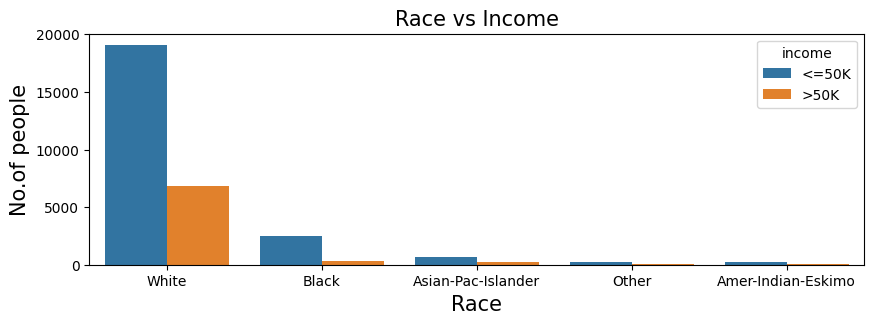

In [68]:
# Plotting the bar charts of race vs income count.

fig, axes = plt.subplots(1,1,figsize=(10,3))
sns.countplot(data=df,x='race',hue='income')
plt.title('Race vs Income',fontsize=15)
plt.xlabel('Race',fontsize=15)
plt.ylabel('No.of people',fontsize=15)
plt.show()

> From above comparison bar graph, we came to understand that White race people have high count of earning income>50k.

### Pie Charts

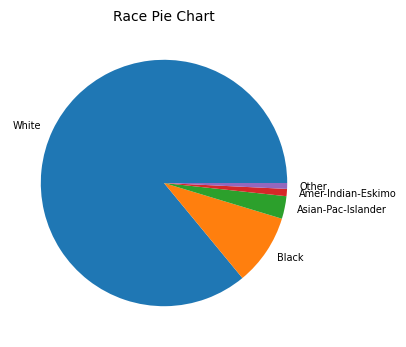

In [69]:
# Plotting the pie chart of race.

label=df.race.value_counts().index
count=df.race.value_counts().values
plt.figure(1, figsize=(4,4))
plt.title("Race Pie Chart",fontsize=10)
plt.pie(x=count,labels=label,textprops={'fontsize':7})
plt.show()

> From above pie chart, we came to understand, this dataset consists of white race people mostly.

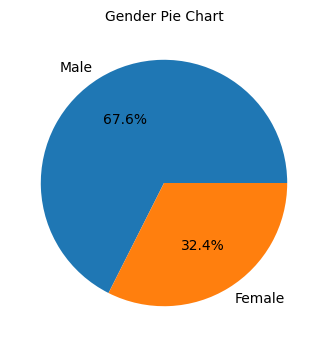

In [70]:
# Plotting the pie chart of gender.

label=df.sex.value_counts().index
count=df.sex.value_counts().values
plt.figure(1, figsize=(4,4))
plt.title("Gender Pie Chart",fontsize=10)
plt.pie(x=count,labels=label,autopct='%1.1f%%')
plt.show()

> From above pie chart, we came to understand, this dataset consists of men of nearly 70 percent.

### Quantitative Variables

### Plot Graphs

<Axes: title={'center': 'Age Distribution'}, xlabel='age', ylabel='Count'>

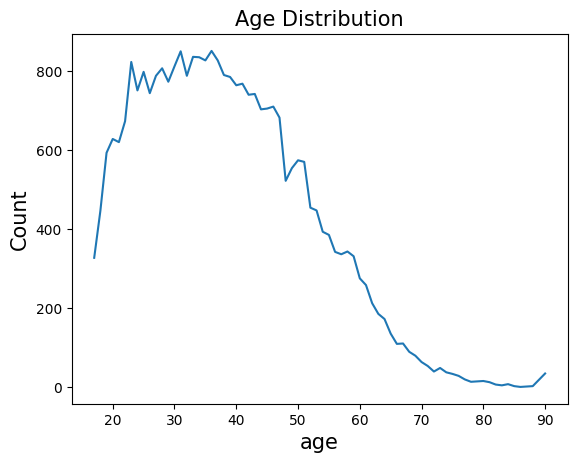

In [71]:
# Plotting the line graph of age.

plt.title("Age Distribution",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
df['age'].value_counts().sort_index().plot()

> From above plot graph, we can see that most of the people belong to the age group of 20-40 years and age
group above 65 has the least number of people.

<Axes: title={'center': 'Hours Per Week Distribution'}, xlabel='hours.per.week', ylabel='Count'>

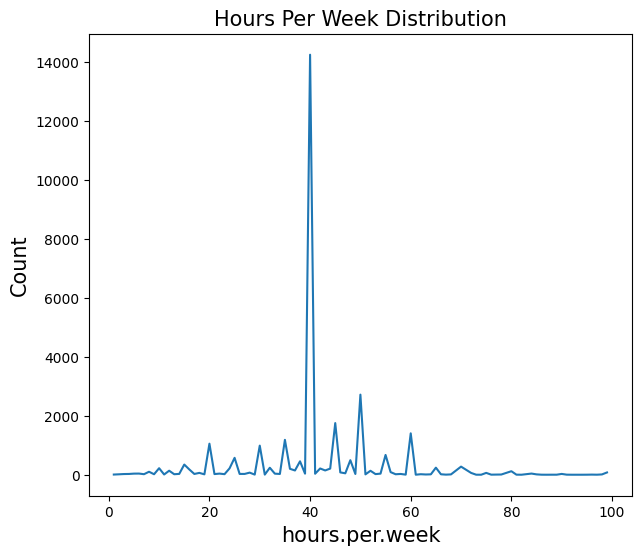

In [72]:
# Plotting the line graph of Hours-per-week.

plt.figure(1,figsize=(7,6))
plt.title("Hours Per Week Distribution",fontsize=15)
plt.xlabel("hours.per.week",fontsize=15)
plt.ylabel("Count",fontsize=15)
df['hours.per.week'].value_counts().sort_index().plot.line()

> From above plot graph, The most of the people works 35 to 50 hours per week, And the mode of hours-per-week is 40.

### Histograms

Text(0, 0.5, 'No.of people')

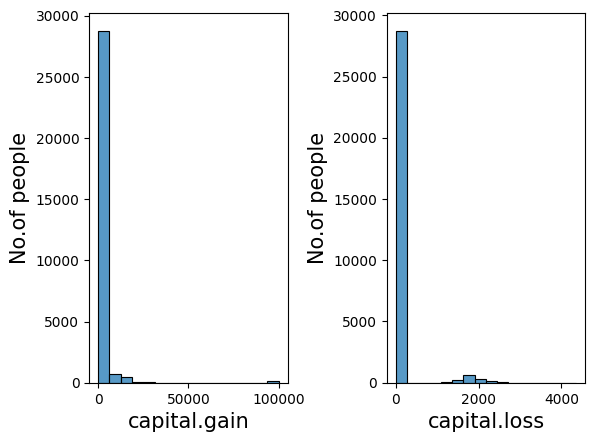

In [73]:
# Plotting histogram of capital-loss vs no. of people and capital-gain vs no. of people.

fig = plt.figure()
fig.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=df,x='capital.gain')
plt.xlabel("capital.gain",fontsize=15)
plt.ylabel("No.of people",fontsize=15)

plt.subplot(1,2,2)
sns.histplot(data=df,x='capital.loss')
plt.xlabel("capital.loss",fontsize=15)
plt.ylabel("No.of people",fontsize=15)

> From above histograms, we came to understand that mode of capital-gain and capital loss is 0.

### Box Plots

Text(0.5, 1.0, 'Box plot representing age and income \n')

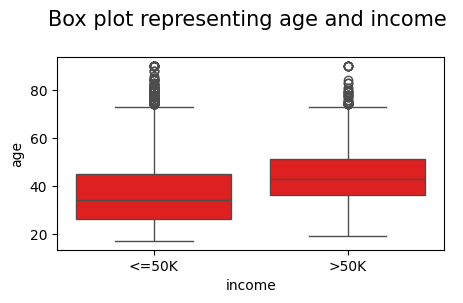

In [74]:
# Box Plotting age vs income.

plt.figure(figsize=(5,2.5))
sns.boxplot(x=df['income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

> As we can see in the Box Plot, the median age of people earning less than 50,000 is around 34 years and that of people earling more than 50,000 is around 45 years.

Text(0.5, 1.0, 'Box plot representing income and hous-per-week \n')

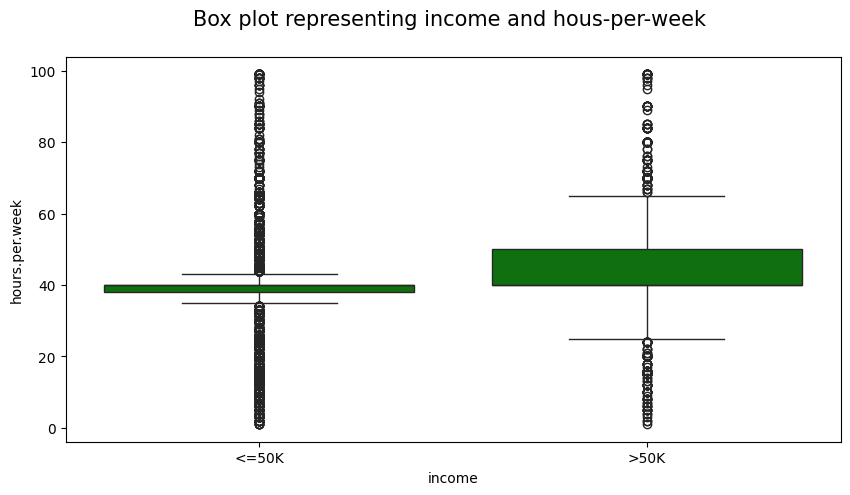

In [75]:
# Box Plotting income vs hours-per-week

plt.figure(figsize=(10,5))
sns.boxplot(x=df['income'],y=df['hours.per.week'],color='g')
plt.title("Box plot representing income and hous-per-week \n", size = 15)

> From above box plot we can conclude that, Most of them having income<=50k working 40 hours per week. Most of them having income>50k working more that 40 hours per week.

### Scatter Plots

Text(0.5, 1.0, 'Relationship between hours worked and age')

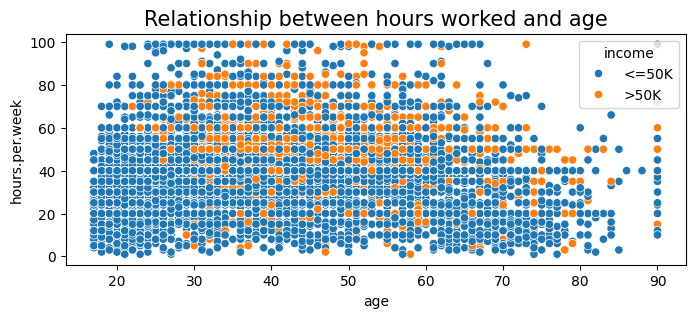

In [76]:
# Scatter Plot between age and hours-per-week with their income.

plt.figure(figsize=(8,3))
sns.scatterplot(data=df,x="age",y="hours.per.week",hue="income")
plt.title('Relationship between hours worked and age',size=15)

> From above scatter plot, we can see more >50k plots above 40 hours per week.

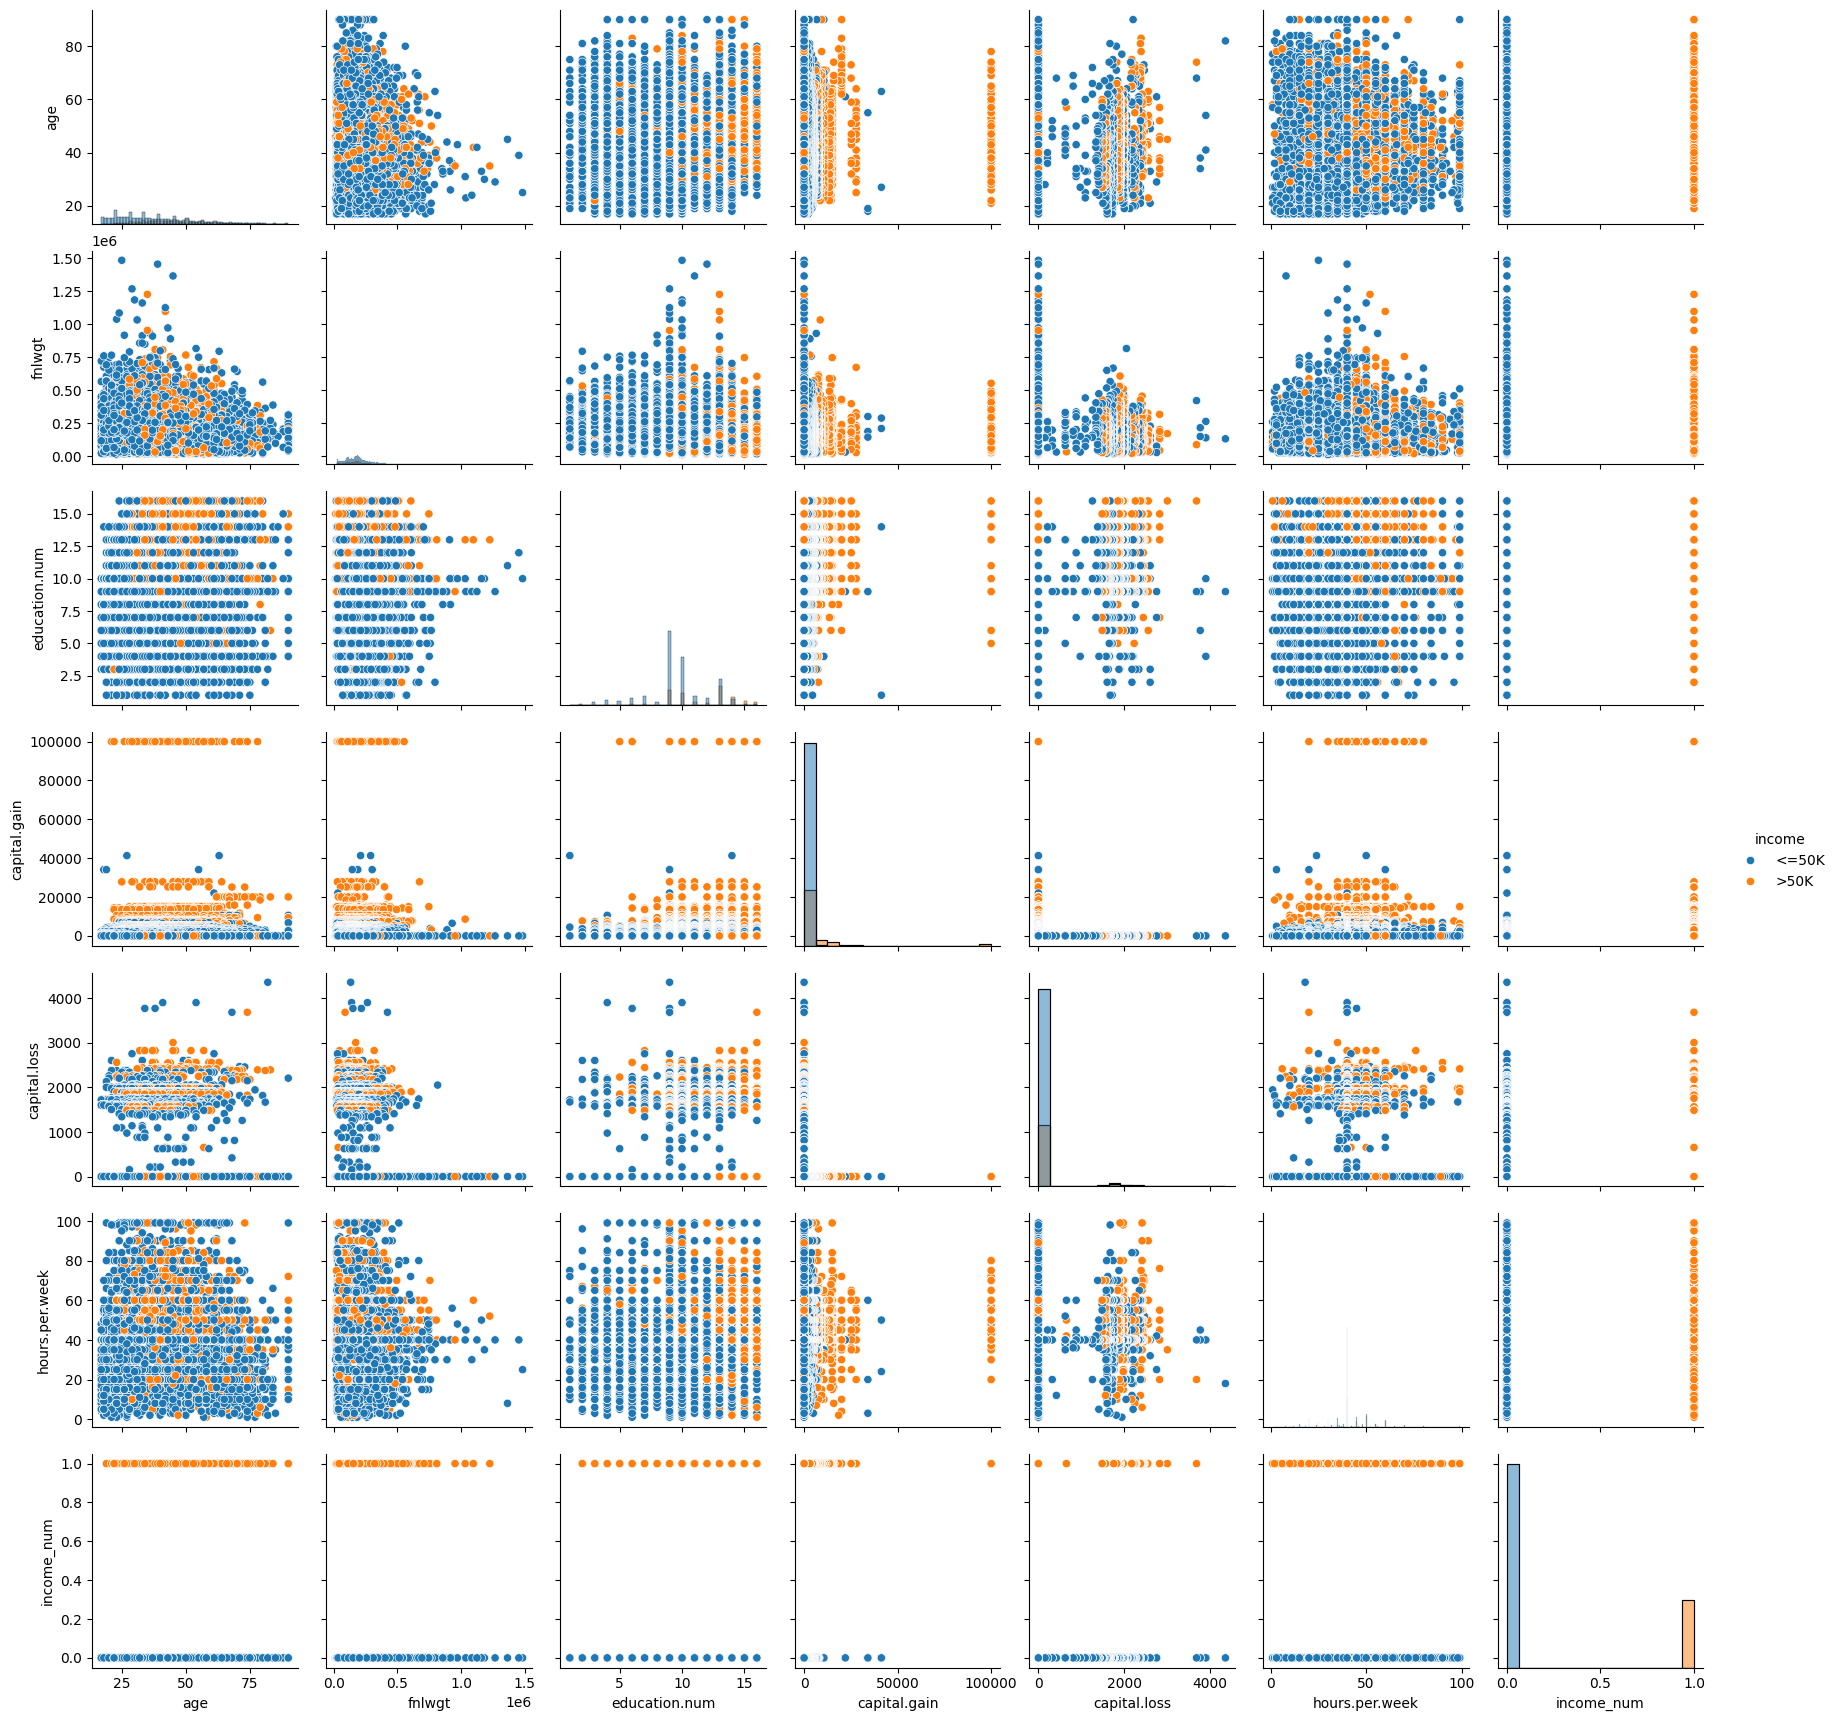

In [77]:
# Scatter plots between all integer columns to identify the patterns between them.

sns.pairplot(df,height =2.5, hue="income", diag_kind="hist")

> The above graph shows the relationship between the quantitative variables. From above scatterplots, we can see that there is not definite correlatio between the numrical variables. fnlwgt and income_num is very weakly co-related.

### Encode Categorical Values

In [78]:
# Encoding columns for scaling the dataframe.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["education.num"]=le.fit_transform(df["education.num"])
df["marital.status"]=le.fit_transform(df["marital.status"])
df["occupation"]=le.fit_transform(df["occupation"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["native.country"]=le.fit_transform(df["native.country"])
df["relationship"]=le.fit_transform(df["relationship"])
df["income"]=le.fit_transform(df["income"])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_num
1,82,2,132870,11,8,6,3,1,4,0,0,4356,18,38,0,0
3,54,2,140359,5,3,0,6,4,4,0,0,3900,40,38,0,0
4,41,2,264663,15,9,5,9,3,4,0,0,3900,40,38,0,0
5,34,2,216864,11,8,0,7,4,4,0,0,3770,45,38,0,0
6,38,2,150601,0,5,5,0,4,4,1,0,3770,40,38,0,0


### Correlation Matrix

<Axes: >

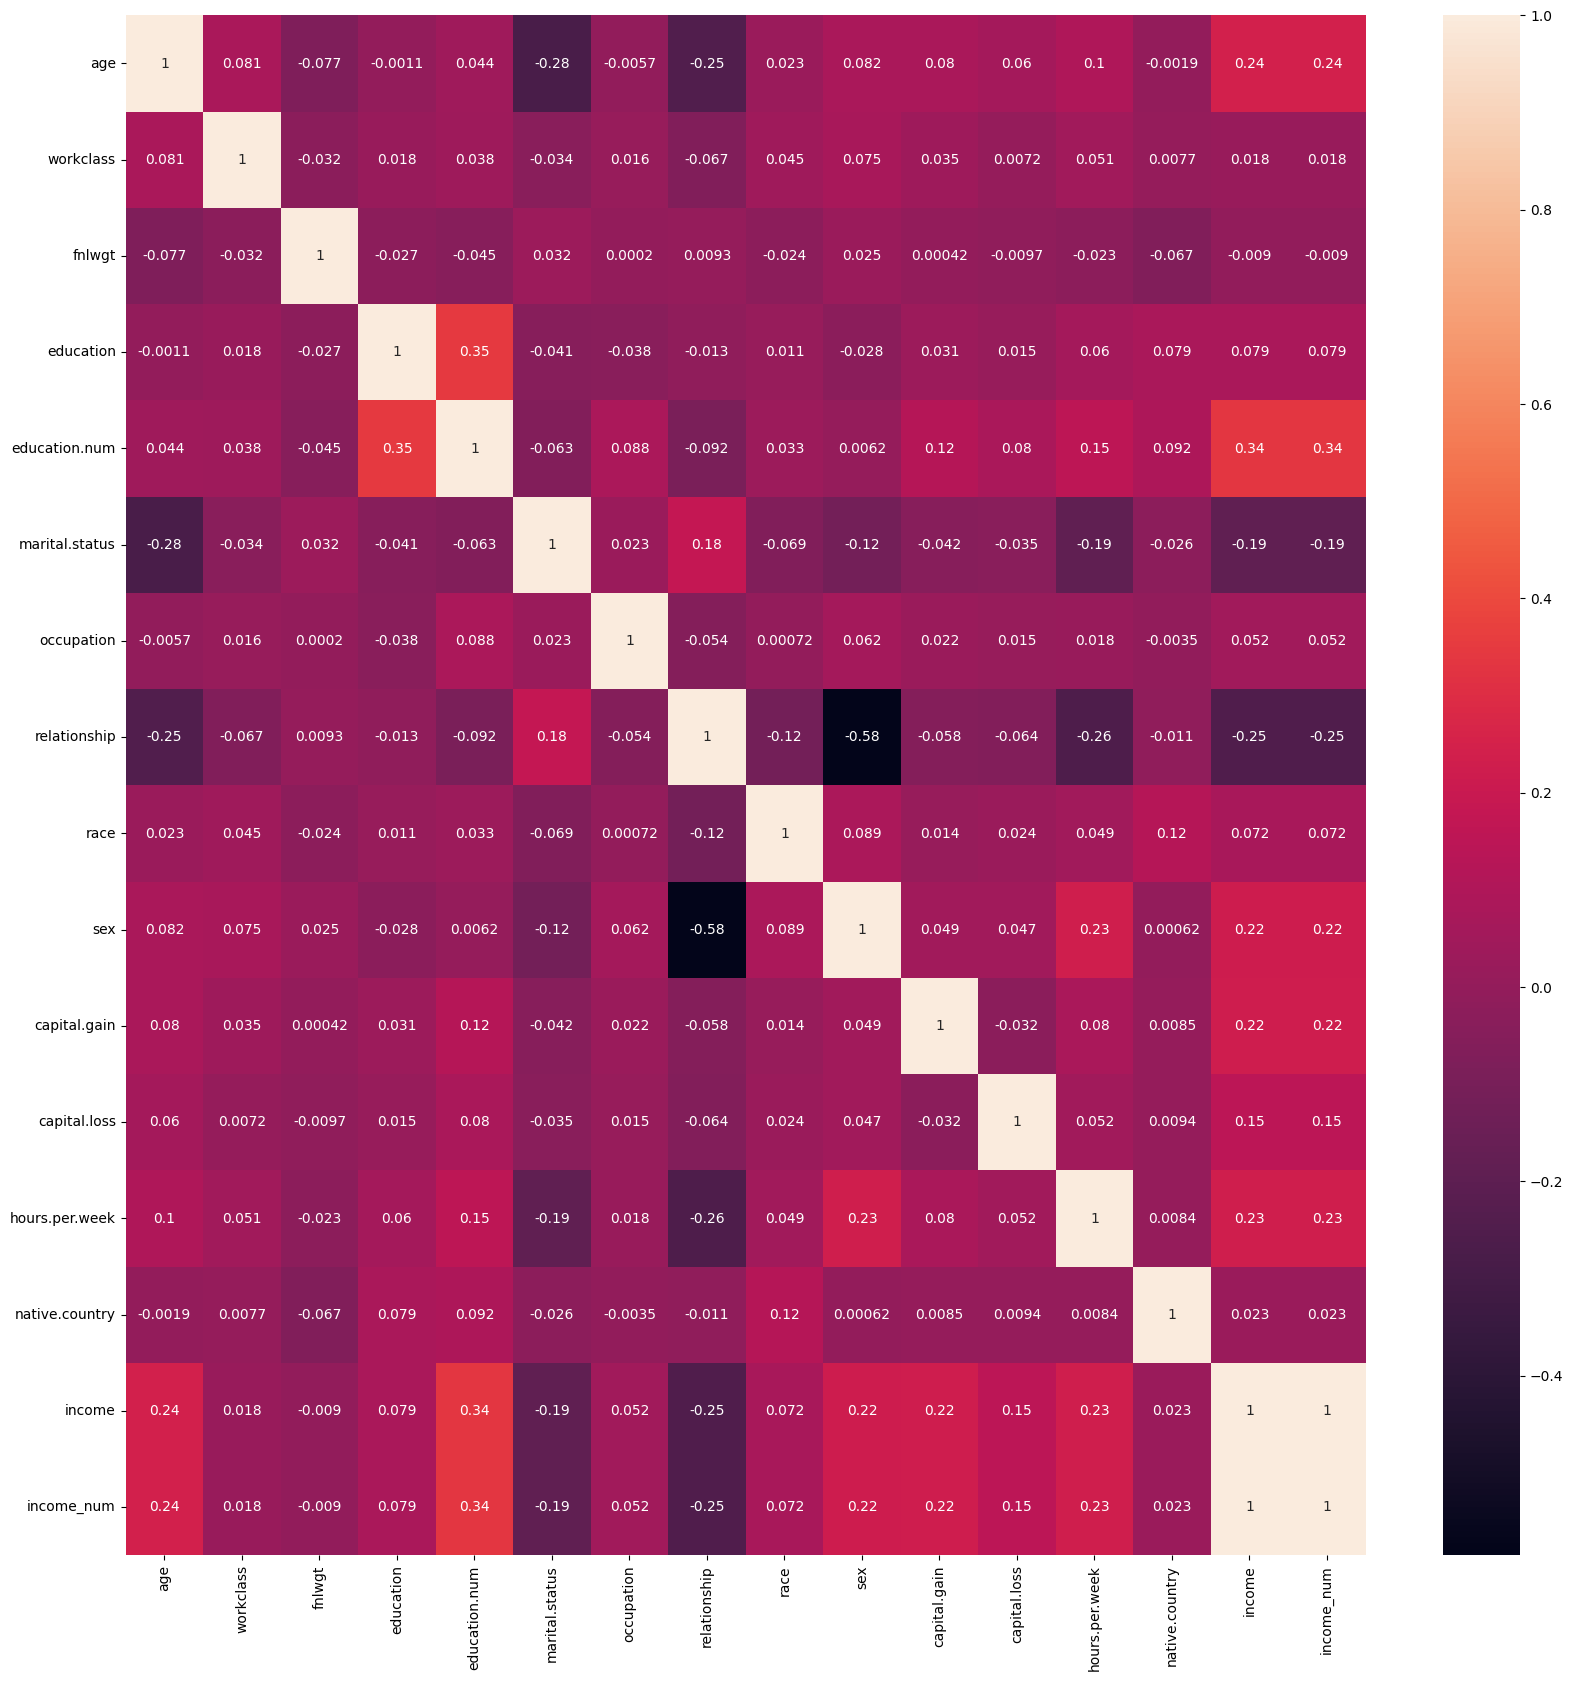

In [79]:
# Heatmap of correlation matrix.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

> From above correlation matrix, we found that the all correlation co-efficients are near to 0. So we can conclude
that all the relationship between quantitative columns are very weakly correlated. fnlwgt and income_num is very weakly
correlated.

### Remove redudant columns

In [80]:
# Removing three columns.

df=df.drop(['income','fnlwgt','relationship'], axis = 1)

> 1.) Income column is removed because we added income_num column instead of it.<br>
2.) fnlwgt is removed because of it is weakly co-related with target variable.<br>
3.) relationship is almost similiar to marital-status so it is removed.

## Data Transformation

### Discretazation (Binning the Outliers)

In [81]:
# Binning the dataframe to adjust the outliers with bin number 10, ordinal encoding, uniform strategy.

from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df = kbins.fit_transform(df)
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.0,3.0,7.0,5.0,9.0,2.0,9.0,0.0,0.0,9.0,1.0,9.0,0.0
1,5.0,3.0,3.0,2.0,0.0,4.0,9.0,0.0,0.0,8.0,3.0,9.0,0.0
2,3.0,3.0,9.0,6.0,8.0,6.0,9.0,0.0,0.0,8.0,3.0,9.0,0.0
3,2.0,3.0,7.0,5.0,0.0,5.0,9.0,0.0,0.0,8.0,4.0,9.0,0.0
4,2.0,3.0,0.0,3.0,8.0,0.0,9.0,9.0,0.0,8.0,3.0,9.0,0.0


In [82]:
# After Discretazation,
# Displaying count, mean, standard deviation, minimum, 25/50/75 percentile, maximum of all int columns.

standard_description = df.describe()
standard_description

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,2.445594,3.303727,6.467177,5.843744,3.891552,4.097109,8.318049,6.081162,0.066541,0.178967,3.389464,8.609044,2.240302
std,1.804044,1.558286,2.379652,1.713707,2.276415,2.931241,1.811643,4.213136,0.649654,0.825233,1.398820,1.489526,3.891564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,6.000000,5.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,3.000000,9.000000,0.000000
50%,2.000000,3.000000,7.000000,6.000000,3.000000,4.000000,9.000000,9.000000,0.000000,0.000000,3.000000,9.000000,0.000000
75%,4.000000,3.000000,8.000000,8.000000,6.000000,6.000000,9.000000,9.000000,0.000000,0.000000,4.000000,9.000000,0.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### Normalization (Scaling of values - MinMaxScalar)

In [83]:
# As it is classification model, we use MinMaxScalar for normalizing of dataframe.

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df=scalar.fit_transform(df)
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.888889,0.333333,0.777778,0.555556,1.000000,0.222222,1.0,0.0,0.0,1.000000,0.111111,1.0,0.0
1,0.555556,0.333333,0.333333,0.222222,0.000000,0.444444,1.0,0.0,0.0,0.888889,0.333333,1.0,0.0
2,0.333333,0.333333,1.000000,0.666667,0.888889,0.666667,1.0,0.0,0.0,0.888889,0.333333,1.0,0.0
3,0.222222,0.333333,0.777778,0.555556,0.000000,0.555556,1.0,0.0,0.0,0.888889,0.444444,1.0,0.0
4,0.222222,0.333333,0.000000,0.333333,0.888889,0.000000,1.0,1.0,0.0,0.888889,0.333333,1.0,0.0


In [84]:
# After Normalizing,
# Displaying count, mean, standard deviation, minimum, 25/50/75 percentile, maximum of all int columns.

scalar_description = df.describe()
scalar_description

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,0.271733,0.367081,0.718575,0.649305,0.432395,0.455234,0.924228,0.675685,0.007393,0.019885,0.376607,0.956560,0.248922
std,0.200449,0.173143,0.264406,0.190412,0.252935,0.325693,0.201294,0.468126,0.072184,0.091693,0.155424,0.165503,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.333333,0.666667,0.555556,0.333333,0.111111,1.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000
50%,0.222222,0.333333,0.777778,0.666667,0.333333,0.444444,1.000000,1.000000,0.000000,0.000000,0.333333,1.000000,0.000000
75%,0.444444,0.333333,0.888889,0.888889,0.666667,0.666667,1.000000,1.000000,0.000000,0.000000,0.444444,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train/Test Split

In [85]:
# Splitting x as source(table of column 0-11) to predict target variable y(column 12)

x=df.drop([12],axis=1)
y=df[12]

In [86]:
# Splitting train, test variables, where test is 20% of the dataframe.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((24129, 12), (6033, 12))

In [87]:
#Balancing the train data to maintain the fairness and to reduce the bias of this model using SMOTE over sampling.

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 6008
Before OverSampling, counts of label '0': 18121
After OverSampling, counts of label '1': 18121
After OverSampling, counts of label '0': 18121


In [88]:
X_train.shape, X_test.shape

((36242, 12), (6033, 12))

In [89]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.222222,0.333333,1.000000,0.666667,0.333333,0.888889,1.000000,1.0,0.0,0.0,0.444444,1.000000
1,0.444444,0.000000,0.777778,0.555556,0.666667,0.000000,0.555556,0.0,0.0,0.0,0.111111,1.000000
2,0.333333,0.666667,0.777778,0.555556,0.333333,0.888889,1.000000,1.0,0.0,0.0,0.444444,1.000000
3,0.000000,0.333333,1.000000,0.666667,0.666667,0.222222,0.777778,1.0,0.0,0.0,0.222222,0.777778
4,0.111111,0.333333,1.000000,0.666667,0.666667,0.333333,1.000000,1.0,0.0,0.0,0.333333,1.000000


## Model Training And Model Performance Metrics

### LogisticRegression

In [90]:
# Building Logistic Regression model.

from sklearn.linear_model import LogisticRegression
logestic=LogisticRegression()
logestic.fit(X_train, y_train)
y_pred=logestic.predict(X_test)

In [91]:
# Evaluating Accuracy, Mean absolute error, Precision, Recall, F1 score of Logistic Regression model.

logestic_accuracy = (logestic.score(X_test,y_test)*100)
print(f'The Accuracy of the Model is {logestic_accuracy}')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

The Accuracy of the Model is 74.55660533731145
Precision: 0.492
Recall: 0.743
F1 Score: 0.592


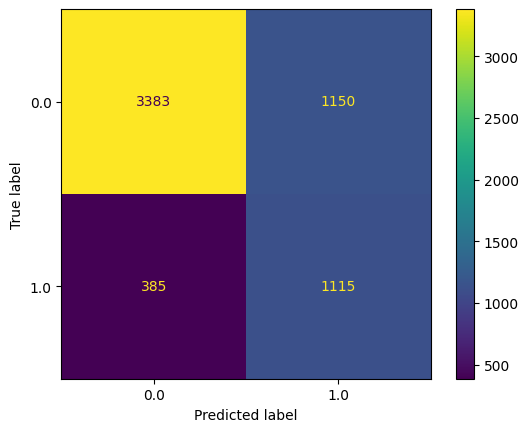

In [92]:
# Displaying Confusion-matrix for logistic regression model.

cm = confusion_matrix(y_test, y_pred, labels=logestic.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logestic.classes_)
disp.plot()
plt.show()

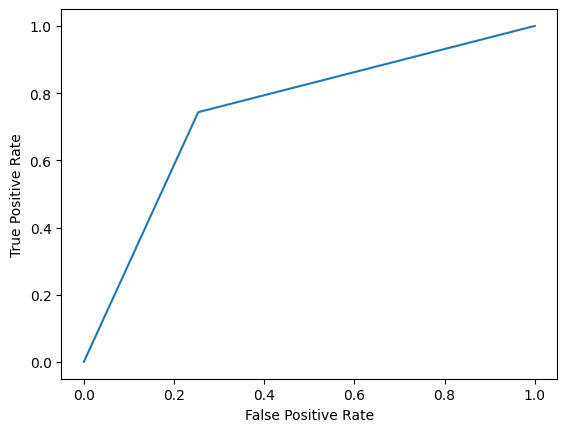

In [93]:
# Displaying ROC-curve for logistic regression model.

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### GradientBoostingClassifier

In [94]:
# Building GradientBoostingClassifier model.

from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=0,learning_rate=0.2,n_estimators=200)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [95]:
# Evaluating Accuracy, Mean absolute error, Precision, Recall, F1 score of GradientBoostingClassifier model.

gradient_accuracy = (model.score(X_test,y_test)*100)
print(f'The Accuracy of the Model is {gradient_accuracy}')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

The Accuracy of the Model is 83.02668655726836
Precision: 0.637
Recall: 0.736
F1 Score: 0.683


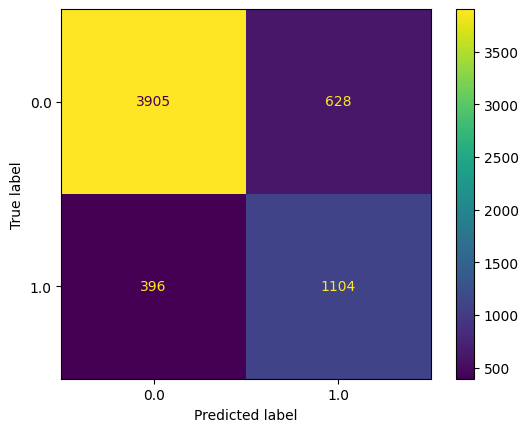

In [96]:
# Displaying Confusion-matrix for GradientBoostingClassifier model.

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

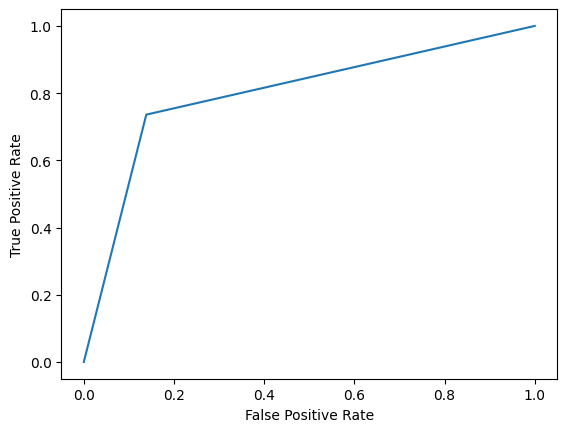

In [97]:
# Displaying ROC-curve for GradientBoostingClassifier model.

fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### DecisionTreeClassifier

In [98]:
# Building DecisionTreeClassifier model.

from sklearn.tree import DecisionTreeClassifier
Decision_classifier=DecisionTreeClassifier()
Decision_classifier.fit(X_train, y_train)
y_pred = Decision_classifier.predict(X_test)

In [99]:
# Evaluating Accuracy, Mean absolute error, Precision, Recall, F1 score of DecisionTreeClassifier model.

decision_accuracy = (Decision_classifier.score(X_test,y_test)*100)
print(f'The Accuracy of the Model is {decision_accuracy}')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

The Accuracy of the Model is 79.84419028675617
Precision: 0.589
Recall: 0.627
F1 Score: 0.607


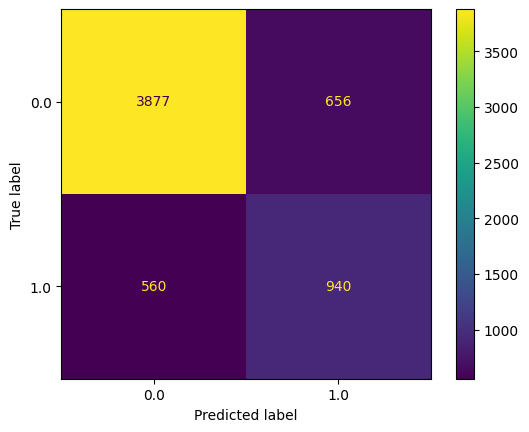

In [100]:
# Displaying Confusion-matrix for DecisionTreeClassifier model.

cm = confusion_matrix(y_test, y_pred, labels=Decision_classifier.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Decision_classifier.classes_)
disp.plot()
plt.show()

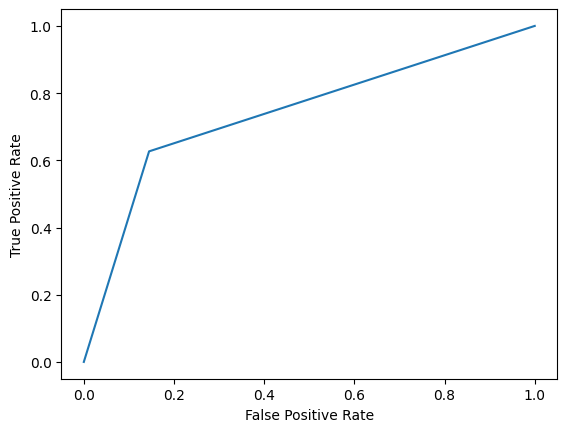

In [101]:
# Displaying ROC-curve for DecisionTreeClassifier model.

fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [102]:
# Building RandomForestClassifier model.

from sklearn.ensemble import RandomForestClassifier
random= RandomForestClassifier(max_depth=2, random_state=0)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

In [103]:
# Evaluating Accuracy, Mean absolute error, Precision, Recall, F1 score of RandomForestClassifier model.

from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Random_Forest_Accuracy=random.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Random_Forest_Accuracy}')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

The Accuracy of the Model is 71.10890104425658
Precision: 0.456
Recall: 0.834
F1 Score: 0.589


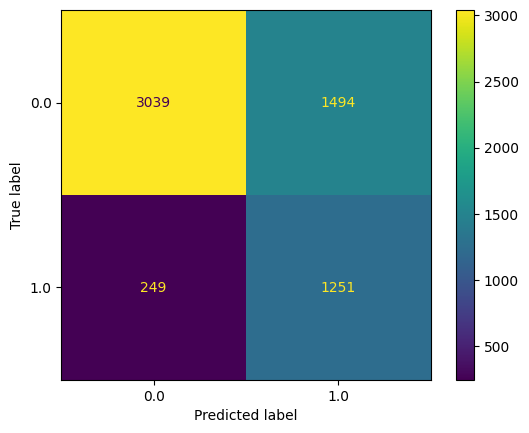

In [104]:
# Displaying Confusion-matrix for RandomForestClassifier model.

cm = confusion_matrix(y_test, y_pred, labels=random.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

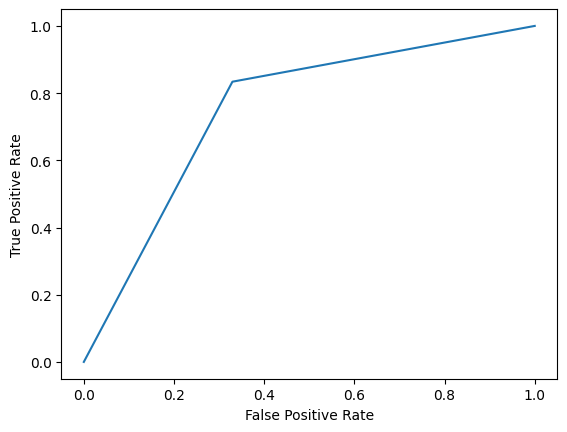

In [105]:
# Displaying ROC-curve for RandomForestClassifier model.

fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### NeuralNetwork MLPClassifier

In [106]:
# Building NeuralNetwork MLPClassifier model.

from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred = neural.predict(X_test)

In [107]:
# Evaluating Accuracy, Mean absolute error, Precision, Recall, F1 score of NeuralNetwork MLPClassifier model.

from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Neural_Accuracy=neural.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Neural_Accuracy}')
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

The Accuracy of the Model is 78.60102768108736
Precision: 0.545
Recall: 0.847
F1 Score: 0.663


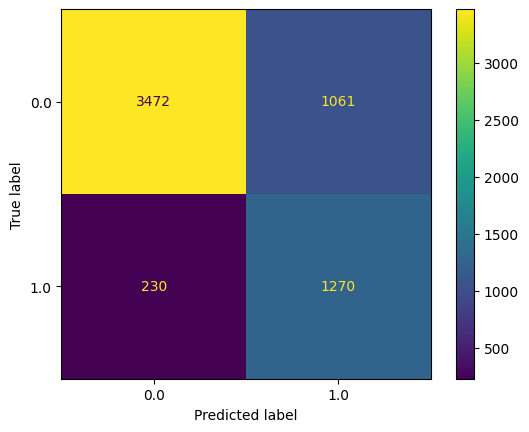

In [108]:
# Displaying Confusion-matrix for NeuralNetwork MLPClassifier model.

cm = confusion_matrix(y_test, y_pred, labels=neural.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neural.classes_)
disp.plot()
plt.show()

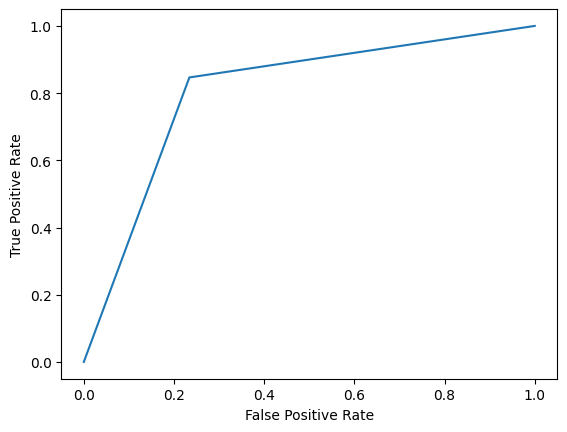

In [109]:
# Displaying ROC-curve for NeuralNetwork MLPClassifier model.

fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Analysing Algorithms

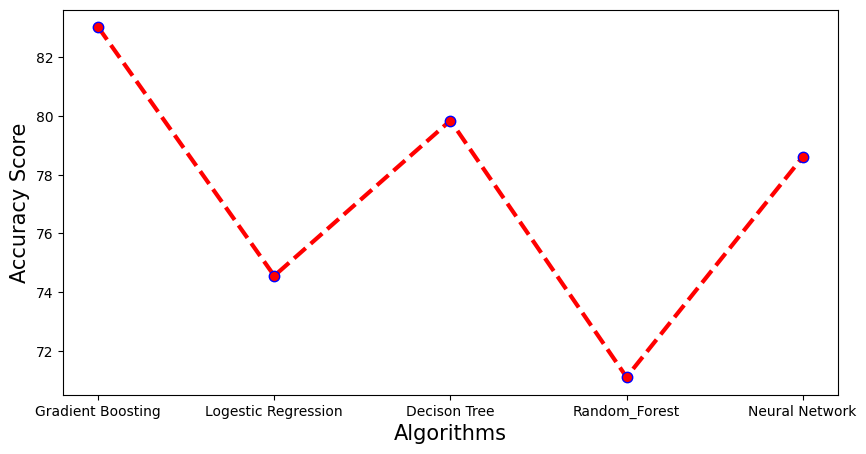

In [110]:
# Comparing Different algorithm models with their respective accuracy.

x=['Gradient Boosting','Logestic Regression','Decison Tree','Random_Forest','Neural Network']
y=[gradient_accuracy,logestic_accuracy,decision_accuracy,Random_Forest_Accuracy,Neural_Accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show()


## Finalizing Model

According to this project, The highest accuracy of the above models is GradientBoostingClassifier  model and RandomForest is the lowest accuracy model.

Since, we are trying to predict income based upon accuracy, we will chose Gradient Boosting for the purpose of our project.